In [34]:
import numpy as np
import pandas as pd
# import model
from sklearn.linear_model import LinearRegression
from sklearn.cross_validation import train_test_split
# import module to calculate model perfomance metrics
from sklearn import metrics

/Users/vishwaprabhakarsingh/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [3]:
df=pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',header=None, sep='\s+')

In [4]:
df.columns = ['CRIM', 'ZN', 'INDUS', 'CHAS','NOX', 'RM', 'AGE', 'DIS', 'RAD','TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

In [5]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


• CRIM: This is the per capita crime rate by town
• ZN: This is the proportion of residential land zoned for lots larger than
25,000 sq.ft.
• INDUS: This is the proportion of non-retail business acres per town
• CHAS: This is the Charles River dummy variable (this is equal to 1 if tract bounds river; 0 otherwise)
• NOX: This is the nitric oxides concentration (parts per 10 million)
• RM: This is the average number of rooms per dwelling
• AGE: This is the proportion of owner-occupied units built prior to 1940
• DIS: This is the weighted distances to five Boston employment centers
• RAD: This is the index of accessibility to radial highways
• TAX: This is the full-value property-tax rate per $10,000
• PTRATIO: This is the pupil-teacher ratio by town
• B: This is calculated as 1000(Bk - 0.63)^2, where Bk is the proportion of people of African American descent by town
• LSTAT: This is the percentage lower status of the population
• MEDV: This is the median value of owner-occupied homes in $1000s

In [6]:
#EDA
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='whitegrid', context='notebook')


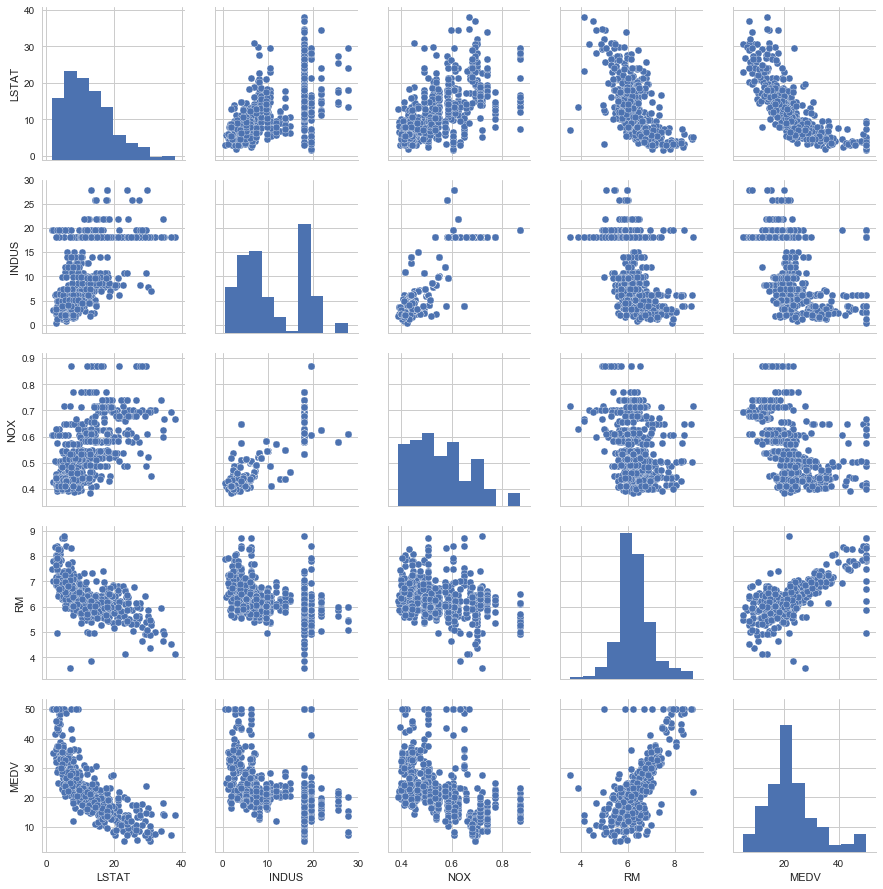

In [7]:
cols = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']
sns.pairplot(df[cols], size=2.5);
plt.show()
#As we can see in the following figure, the scatterplot matrix provides us with a useful graphical summary of the relationships in a dataset:

In the following code example, we will use NumPy's corrcoef function on the five feature columns that we previously visualized in the scatterplot matrix, and we will use seaborn's heatmap function to plot the correlation matrix array as a heat map:


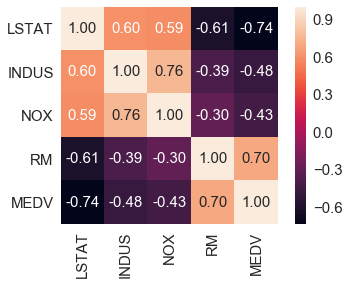

In [10]:
import numpy as np
cm = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,
        cbar=True,
        annot=True,
        square=True,
        fmt='.2f',
        annot_kws={'size': 15},
        yticklabels=cols,
        xticklabels=cols)
plt.show()

To fit a linear regression model, we are interested in those features that have a high correlation with our target variable MEDV. Looking at the preceding correlation matrix, we see that our target variable MEDV shows the largest correlation with
the LSTAT variable (-0.74). However, as you might remember from the scatterplot matrix, there is a clear nonlinear relationship between LSTAT and MEDV. On the other hand, the correlation between RM and MEDV is also relatively high (0.70) and given the linear relationship between those two variables that we observed in the scatterplot, RM seems to be a good choice for an exploratory variable to introduce the concepts of a simple linear regression model in the following section.

#Solving regression for regression parameters with gradient descent

In [16]:
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter =n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
           output = self.net_input(X)
           errors = (y - output)
           self.w_[1:] += self.eta * X.T.dot(errors)
           self.w_[0] += self.eta * errors.sum()
           cost = (errors**2).sum() / 2.0
           self.cost_.append(cost)
        return self
    def net_input(self, X):
       return np.dot(X, self.w_[1:]) + self.w_[0]
    def predict(self, X):
       return self.net_input(X)

In [31]:
X = df[['RM']].values
y = df['MEDV'].values
X.reshape(1,-1)
y.reshape(1,-1)

array([[ 24. ,  21.6,  34.7,  33.4,  36.2,  28.7,  22.9,  27.1,  16.5,
         18.9,  15. ,  18.9,  21.7,  20.4,  18.2,  19.9,  23.1,  17.5,
         20.2,  18.2,  13.6,  19.6,  15.2,  14.5,  15.6,  13.9,  16.6,
         14.8,  18.4,  21. ,  12.7,  14.5,  13.2,  13.1,  13.5,  18.9,
         20. ,  21. ,  24.7,  30.8,  34.9,  26.6,  25.3,  24.7,  21.2,
         19.3,  20. ,  16.6,  14.4,  19.4,  19.7,  20.5,  25. ,  23.4,
         18.9,  35.4,  24.7,  31.6,  23.3,  19.6,  18.7,  16. ,  22.2,
         25. ,  33. ,  23.5,  19.4,  22. ,  17.4,  20.9,  24.2,  21.7,
         22.8,  23.4,  24.1,  21.4,  20. ,  20.8,  21.2,  20.3,  28. ,
         23.9,  24.8,  22.9,  23.9,  26.6,  22.5,  22.2,  23.6,  28.7,
         22.6,  22. ,  22.9,  25. ,  20.6,  28.4,  21.4,  38.7,  43.8,
         33.2,  27.5,  26.5,  18.6,  19.3,  20.1,  19.5,  19.5,  20.4,
         19.8,  19.4,  21.7,  22.8,  18.8,  18.7,  18.5,  18.3,  21.2,
         19.2,  20.4,  19.3,  22. ,  20.3,  20.5,  17.3,  18.8,  21.4,
      

In [35]:

#data = pd.read_csv(data_path, index_col=0)
data=df

# create a Python list of feature names
#feature_names = ['TV', 'Radio', 'Newspaper']
feature_names = ['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV']

# use the list to select a subset of the original DataFrame
X = data[feature_names]

# sales
#y = data.Sales
y = df['MEDV'].values



# Splitting X and y into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# Linear Regression Model
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_pred = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

4.11416409428e-15


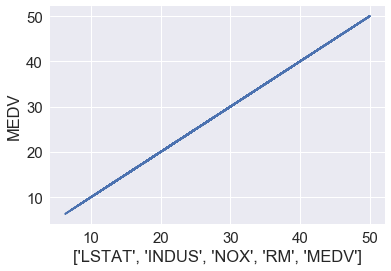

In [51]:

plt.plot(y_test, y_pred)
plt.ylabel('MEDV')
plt.xlabel(['LSTAT', 'INDUS', 'NOX', 'RM', 'MEDV'])
plt.show()

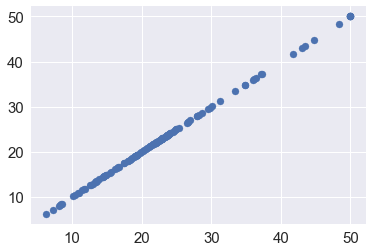

In [42]:
plt.scatter(y_test,y_pred)
plt.show()

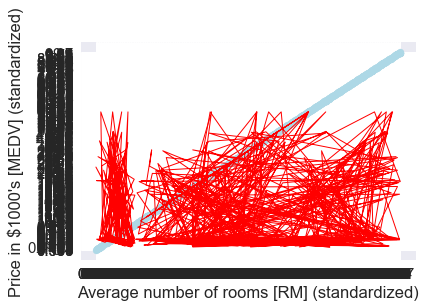

In [55]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='lightblue')
    plt.plot(X, model.predict(X), color='red', linewidth=1)
    return

lin_regplot(X_test, X_test, linreg)
plt.xlabel('Average number of rooms [RM] (standardized)')
plt.ylabel('Price in $1000\'s [MEDV] (standardized)')
plt.show()